# WeatherPy
----

### Analysis
* The humidity increases as one approaches the equator (0 Deg. Latitude). The northen hemisphere also tends to be slightly less humid than the southern hemisphere.
* While there is no clear relationship between latitude and cloudiness, a majority of cities tend to either have 0%, 20%, 40% or around 78% and 95% cloudiness.
* The highest temperatures occur between 30 Deg. and 40 Deg. Latitude. This is probably because of the high pressure system due to the hot air descending onto these latitudes.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Create lists to store data
city_data = []
cloudiness_data = []
country_data = []
date_data = []
humidity_data = []
lat_data = []
lon_data = []
max_temp_data = []
wind_speed_data = []

# Initialize variables
records = 1
sets = 1

# Print beginning text
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through cities
for city in cities:
    try:
        # Gather OpenWeatherMap and city information
        response = requests.get(query_url + city).json()
        
        # Fill each list with corresponding data
        city_data.append(response["name"])
        cloudiness_data.append(response["clouds"]["all"])
        country_data.append(response["sys"]["country"])
        date_data.append(response["dt"])
        humidity_data.append(response["main"]["humidity"])
        lat_data.append(response["coord"]["lat"])
        lon_data.append(response["coord"]["lon"])
        max_temp_data.append(response["main"]["temp_max"])
        wind_speed_data.append(response["wind"]["speed"])
        
        # Include a print log of each city as it'sbeing processed (with the city number and city name)
        print("Processing Record " + str(records) + " of Set " + str(sets)+ " | " +  str(response.get("name")))
    
    # Add exception for no city data so the loop continues to run
    except:
        print("City not found. Skipping...")
        continue   
    
    # Categorize fifty records into each set
    if records == 50:
        sets += 1
        records = 0
    records += 1

# Print ending text
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Semey
Processing Record 2 of Set 1 | Kavieng
Processing Record 3 of Set 1 | Hilo
Processing Record 4 of Set 1 | Misrikh
Processing Record 5 of Set 1 | Hasaki
Processing Record 6 of Set 1 | Lagoa
Processing Record 7 of Set 1 | Te Anau
Processing Record 8 of Set 1 | Berlevag
Processing Record 9 of Set 1 | Punta Arenas
Processing Record 10 of Set 1 | Kapaa
Processing Record 11 of Set 1 | Mataura
Processing Record 12 of Set 1 | Hobart
Processing Record 13 of Set 1 | Bluff
Processing Record 14 of Set 1 | Khatanga
Processing Record 15 of Set 1 | Bredasdorp
City not found. Skipping...
Processing Record 16 of Set 1 | Vao
Processing Record 17 of Set 1 | Yar-Sale
Processing Record 18 of Set 1 | Arraial do Cabo
Processing Record 19 of Set 1 | Camacha
Processing Record 20 of Set 1 | Vaini
City not found. Skipping...
Processing Record 21 of Set 1 | Lavrentiya
Processing Record 22 of Set 1 | Sioux Lookout
Processin

Processing Record 37 of Set 4 | San Rafael
Processing Record 38 of Set 4 | Burgeo
City not found. Skipping...
Processing Record 39 of Set 4 | Bend
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 4 | Pimentel
Processing Record 41 of Set 4 | Zhangjiakou
Processing Record 42 of Set 4 | Peterhead
City not found. Skipping...
Processing Record 43 of Set 4 | Soe
Processing Record 44 of Set 4 | Sorland
Processing Record 45 of Set 4 | Upernavik
Processing Record 46 of Set 4 | Ancud
Processing Record 47 of Set 4 | Estevan
Processing Record 48 of Set 4 | Aracati
Processing Record 49 of Set 4 | Thompson
Processing Record 50 of Set 4 | Conceicao do Araguaia
Processing Record 1 of Set 5 | Pitimbu
Processing Record 2 of Set 5 | Hirado
City not found. Skipping...
Processing Record 3 of Set 5 | Aden
Processing Record 4 of Set 5 | Yellowknife
City not found. Skipping...
Processing Record 5 of Set 5 | Shenjiamen
Processing Record 6 of Set 5 | Luganville
Processing Reco

Processing Record 16 of Set 8 | Maceio
Processing Record 17 of Set 8 | Camocim
Processing Record 18 of Set 8 | Laguna
City not found. Skipping...
Processing Record 19 of Set 8 | Kargasok
City not found. Skipping...
Processing Record 20 of Set 8 | Dapaong
Processing Record 21 of Set 8 | Kulhudhuffushi
Processing Record 22 of Set 8 | Curitibanos
Processing Record 23 of Set 8 | Grand Gaube
Processing Record 24 of Set 8 | Guerrero Negro
Processing Record 25 of Set 8 | Alta Floresta
Processing Record 26 of Set 8 | Disa
Processing Record 27 of Set 8 | Spokane
Processing Record 28 of Set 8 | Winnemucca
Processing Record 29 of Set 8 | Bandarbeyla
Processing Record 30 of Set 8 | Ulaanbaatar
Processing Record 31 of Set 8 | Edd
Processing Record 32 of Set 8 | Clyde River
Processing Record 33 of Set 8 | Vasterhaninge
Processing Record 34 of Set 8 | Luanda
Processing Record 35 of Set 8 | Hanting
Processing Record 36 of Set 8 | Chupaca
Processing Record 37 of Set 8 | Marmande
Processing Record 38 of

Processing Record 47 of Set 11 | Bonham
Processing Record 48 of Set 11 | Jingdezhen
Processing Record 49 of Set 11 | Palmer
Processing Record 50 of Set 11 | Vallenar
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Store each list into a dictionary
weather_data = {"City" : city_data,
                "Cloudiness": cloudiness_data,
                "Country": country_data,
                "Date": date_data,
                "Humidity": humidity_data,
                "Lat": lat_data,
                "Lng": lon_data,
                "Max Temp": max_temp_data,
                "Wind Speed": wind_speed_data,
                }

# Convert the dictionary to a DataFrame
weather_data = pd.DataFrame(weather_data)

# Display weather data count
weather_data.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [5]:
# Export the city data into a .csv.
weather_data.to_csv(output_data_file)

# Display the DataFrame
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Semey,0,KZ,1538260817,83,50.41,80.25,37.45,3.15
1,Kavieng,8,PG,1538260818,100,-2.57,150.80,85.42,5.61
2,Hilo,20,US,1538258760,67,19.71,-155.08,86.00,11.41
3,Misrikh,0,IN,1538260818,78,27.43,80.53,71.20,5.61
4,Hasaki,75,JP,1538259960,100,35.73,140.83,66.20,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

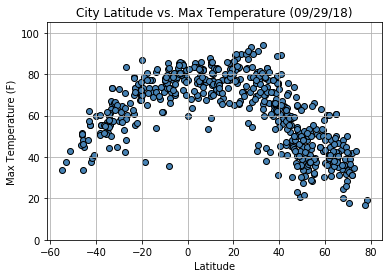

In [6]:
# Define the "date" variable using the datetime module
date = str(weather_data.iloc[0,3])

date = datetime.datetime.fromtimestamp(int(date)).strftime("(%m/%d/%y)")

# Make a scatter plot for City Latitude vs. Max Temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + " " + date)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(0, 105)
plt.grid()

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

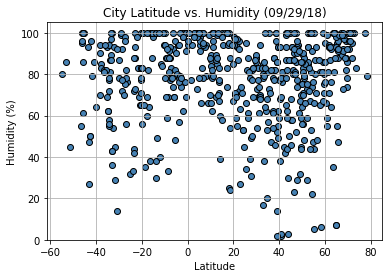

In [7]:
# Make a scatter plot for City Latitude vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity" + " " + date)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(0, 105)
plt.grid()

# Save the figure
plt.savefig("City Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

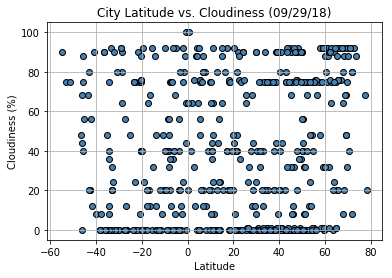

In [8]:
# Make a scatter plot for City Latitude vs. Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + " " + date)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(-5, 105)
plt.grid()

# Save the figure
plt.savefig("City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

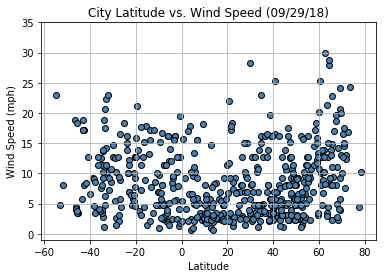

In [9]:
# Make a scatter plot for City Latitude vs. Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + " " + date)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(-1, 35)
plt.grid()

# Save the figure
plt.savefig("City Latitude vs. Wind Speed.png")

# Show plot
plt.show()